Import libraries and load the file

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [14]:
df = pd.read_csv('data.csv')

In [15]:
hex_features =[ i for i in df.columns if i not in ('Unnamed: 0', 'ID','Class','size', '??')]
other_features = ['??','size']
dependent_variable = ['Class']

#### Exploratory Data Analysis
Since our dependent variable is Class, lets try to compare the other features with it.

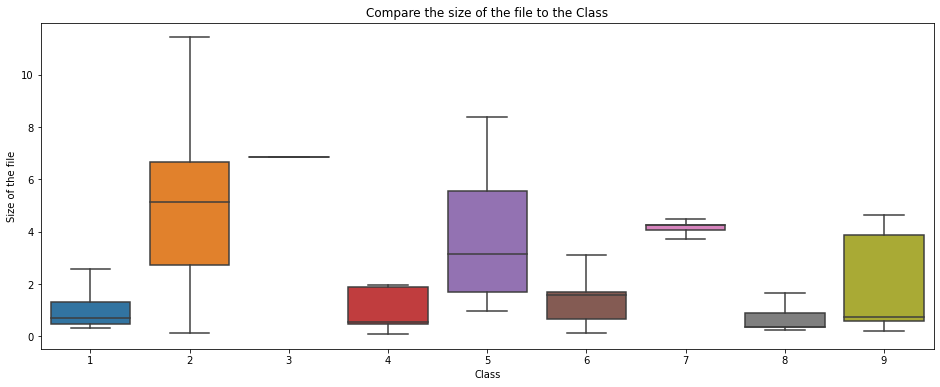

In [16]:
fig, ax = plt.subplots(figsize=(16,6))
sns.boxplot(x="Class", y="size", data=df,ax=ax , showfliers = False)
plt.title('Compare the size of the file to the Class')
plt.ylabel('Size of the file')
plt.show()

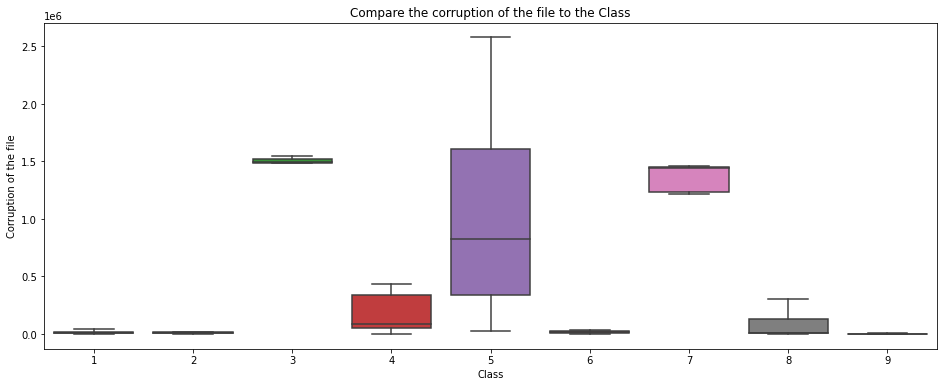

In [17]:
fig, ax = plt.subplots(figsize=(16,6))
sns.boxplot(x="Class", y="??", data=df,ax=ax , showfliers = False)
plt.title('Compare the corruption of the file to the Class')
plt.ylabel('Corruption of the file')
plt.show()

In [18]:
df[hex_features + dependent_variable].groupby('Class').mean()

0             1             2             3             4  \
Class                                                                          
1       65897.035691   4412.489293   2346.030500   2173.881895   3237.161583   
2       72753.119855  22236.648910  35678.728410  23386.773204  29764.191283   
3       10617.617947   5448.602311   3527.649218   3610.325629   3595.171992   
4        4853.290526    639.322105    617.096842    710.953684    711.520000   
5       15975.571429   1532.238095   1426.952381   1242.047619   1431.095238   
6       59512.460719   2013.996005   1585.754993   1642.719041   1703.364847   
7       53003.412060   4743.359296   4133.198492   1726.899497   4399.497487   
8       30418.707655   1052.874593    513.080619    571.418567    731.506515   
9      166889.059230   4725.291214   2690.278381   2156.510365   3602.853899   

                  5             6             7             8            9  \
Class                                                                        
1       1580.265412   1360.637249   1335.080467   3223.550292  1098.412070   
2      11201.546812  26639.945117  10157.450363  12656.197740  6706.054883   
3       3553.383753   3534.159415   3552.308973   3547.169952  3548.658396   
4        596.444211    587.016842    590.178947    614.372632   590.602105   
5       1195.738095   1018.309524    990.285714   1448.571429  1026.523810   
6       1463.556591   1446.197071   1464.645806   1633.342210  1397.486019   
7       2092.811558   1023.389447    570.522613   3743.494975  1819.934673   
8        452.742671    341.013029    349.821661    558.698697   309.186482   
9       3845.237907   3100.446199   1947.154985   4086.587364  1744.289240   

       ...           f6           f7           f8           f9           fa  \
Class  ...                                                                    
1      ...  1005.283582   903.776119  1450.686567   840.167424   753.145360   
2      ...  2357.183616  7053.750605  6779.592010  2653.932607  3812.357546   
3      ...  3479.734534  3483.701903  3476.004419  3487.718219  3481.684908   
4      ...   584.547368   619.644211   608.720000   584.572632   613.713684   
5      ...   821.285714   851.738095   911.761905   816.714286   825.333333   
6      ...  1350.163782  1402.282290  1427.340879  1306.966711  1310.294274   
7      ...   146.050251   130.881910   204.271357   108.065327   203.386935   
8      ...   432.702769   556.423453   759.384365   406.713355   382.565961   
9      ...  1788.676209  1574.211254  2264.718657  1781.786772  1620.374136   

                fb           fc           fd           fe            ff  
Class                                                                    
1       851.051914  1709.206360  1065.271901  1370.096042  16177.737184  
2      1733.359161  7349.487490  3892.965295  6476.071832  38779.420500  
3      3482.984364  3492.618967  3506.389871  3499.400748   6670.020394  
4       589.244211   618.844211   583.745263   586.216842    916.671579  
5       837.476190   909.785714   828.928571   878.428571   2300.595238  
6      1316.596538  1396.081225  1308.179760  1412.990679  13485.719041  
7       116.914573   173.409548   133.663317   210.092965   1581.733668  
8       409.111564   731.783388   367.318404   429.824104   3752.257329  
9      1750.282330  2037.403751  2369.172754  2850.069102  14901.444225  

[9 rows x 256 columns]

#### Preprocessing

In [19]:
# df['ratio_of_corruption'] = df[hex_features].sum(axis = 1)/ (df['??'] + df[hex_features].sum(axis = 1))
# df.groupby('Class').ratio_of_corruption.describe()


X, y = df[hex_features + other_features], df[dependent_variable[0]]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#### Train Test split

In [20]:
features = hex_features + other_features #+ ['ratio_of_corruption']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify = y)

#### Model 1 : Multi Layered Perceptron

In [33]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
mlp_pred  = clf.predict(X_test)

In [35]:
print("accuracy = {}".format(accuracy_score(mlp_pred, y_test)))

accuracy = 0.952161913523459


In [36]:
confusion_matrix(y_test, mlp_pred)

array([[297,   3,   1,   1,   1,   0,   0,   3,   2],
       [ 15, 451,   1,   0,   0,   5,   3,  13,   8],
       [  0,   0, 586,   0,   0,   2,   0,   0,   0],
       [  2,   0,   0,  92,   0,   1,   0,   0,   0],
       [  1,   0,   0,   0,   7,   0,   0,   0,   0],
       [  3,   0,   0,   1,   1, 143,   0,   2,   0],
       [  1,   2,   0,   0,   0,   2,  75,   0,   0],
       [  6,   0,   0,   0,   0,   3,   0, 236,   1],
       [  7,   8,   1,   0,   0,   2,   0,   2, 183]])

Lets dig deeper on Model 1 by using grid search.

In [51]:
parameters = {'hidden_layer_sizes':[(100,),(256,),(512,), (128,64,32), (256,128,64,32)]}
mlp = MLPClassifier(random_state=1, max_iter=500)
clf = GridSearchCV(mlp, parameters, verbose = 2, n_jobs= 3)
clf.fit(X_train, y_train)

print('Best Params: {}'.format(clf.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:  5.1min finished


Best Params: {'hidden_layer_sizes': (256, 128, 64, 32)}


In [53]:
final_clf = MLPClassifier(random_state=1, max_iter=500,
                          hidden_layer_sizes= clf.best_params_['hidden_layer_sizes'],verbose = 1).fit(X_train, y_train)

Iteration 1, loss = 1.15837198
Iteration 2, loss = 0.62835334
Iteration 3, loss = 0.48154765
Iteration 4, loss = 0.39587647
Iteration 5, loss = 0.31923876
Iteration 6, loss = 0.27581060
Iteration 7, loss = 0.25445423
Iteration 8, loss = 0.20586801
Iteration 9, loss = 0.18956587
Iteration 10, loss = 0.17868769
Iteration 11, loss = 0.16294223
Iteration 12, loss = 0.15611169
Iteration 13, loss = 0.13994016
Iteration 14, loss = 0.13627308
Iteration 15, loss = 0.12633496
Iteration 16, loss = 0.12355697
Iteration 17, loss = 0.11541148
Iteration 18, loss = 0.10983907
Iteration 19, loss = 0.10949277
Iteration 20, loss = 0.10503126
Iteration 21, loss = 0.09646427
Iteration 22, loss = 0.12243557
Iteration 23, loss = 0.08966009
Iteration 24, loss = 0.08638443
Iteration 25, loss = 0.08071032
Iteration 26, loss = 0.07697033
Iteration 27, loss = 0.07232187
Iteration 28, loss = 0.07647701
Iteration 29, loss = 0.08207056
Iteration 30, loss = 0.07527650
Iteration 31, loss = 0.07011014
Iteration 32, los

In [54]:
new_mlp_pred  = final_clf.predict(X_test)

In [55]:
print("accuracy = {}".format(accuracy_score(new_mlp_pred, y_test)))

accuracy = 0.9659613615455381


In [56]:
confusion_matrix(y_test, new_mlp_pred)

array([[298,   2,   0,   1,   1,   1,   0,   3,   2],
       [  3, 478,   0,   4,   1,   1,   1,   5,   3],
       [  0,   0, 587,   0,   0,   1,   0,   0,   0],
       [  1,   0,   0,  93,   0,   0,   0,   1,   0],
       [  1,   0,   0,   0,   7,   0,   0,   0,   0],
       [  2,   1,   0,   6,   1, 134,   0,   6,   0],
       [  0,   2,   0,   0,   0,   0,  78,   0,   0],
       [  3,   3,   0,   0,   0,   3,   0, 236,   1],
       [  2,   5,   1,   2,   0,   0,   1,   3, 189]])

#### Model 2 : Decision Trees

In [65]:
parameters = {'min_samples_split':[2, 5, 10, 20], 'max_depth':[5,10,15,20,50]}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters, verbose = 2, n_jobs= 3)
clf.fit(X_train, y_train)

print('Best Params: {}'.format(clf.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   11.4s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   39.8s finished


Best Params: {'max_depth': 20, 'min_samples_split': 2}


In [66]:
final_dt = DecisionTreeClassifier(min_samples_split= clf.best_params_['min_samples_split'],
                                 max_depth=clf.best_params_['max_depth']).fit(X_train, y_train)

In [92]:
dt_pred  = final_dt.predict(X_test)

In [93]:
print("accuracy = {}".format(accuracy_score(dt_pred, y_test)))

accuracy = 0.9599816007359706


In [94]:
confusion_matrix(y_test, dt_pred)

array([[293,   3,   0,   1,   1,   4,   0,   4,   2],
       [  9, 473,   0,   2,   0,   3,   1,   5,   3],
       [  0,   0, 588,   0,   0,   0,   0,   0,   0],
       [  1,   2,   0,  88,   0,   2,   0,   1,   1],
       [  1,   1,   0,   0,   4,   2,   0,   0,   0],
       [  3,   0,   0,   1,   2, 137,   1,   5,   1],
       [  2,   1,   0,   0,   0,   0,  76,   0,   1],
       [  3,   3,   0,   1,   0,   2,   0, 237,   0],
       [  5,   2,   2,   0,   0,   1,   0,   2, 191]])

#### Model 3: Logistic Regression

In [77]:
parameters = {'penalty':['elasticnet'],
              'C':np.logspace(0, 3,3 ),
              'l1_ratio': [0,1]}

lr = LogisticRegression(solver= 'saga',max_iter=100)
clf = GridSearchCV(lr, parameters, verbose = 1, n_jobs= 4)
clf.fit(X_train, y_train)

print('Best Params: {}'.format(clf.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  1.7min finished


Best Params: {'C': 31.622776601683793, 'l1_ratio': 0, 'penalty': 'elasticnet'}


/home/vamsi/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [87]:
final_lr = LogisticRegression(solver= 'saga',
                              max_iter=100,
                             penalty = clf.best_params_['penalty'],
                             C =clf.best_params_['C'],
                             l1_ratio = clf.best_params_['l1_ratio']).fit(X_train, y_train)

/home/vamsi/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [88]:
lr_pred  = final_lr.predict(X_test)

In [89]:
print("accuracy = {}".format(accuracy_score(lr_pred, y_test)))

accuracy = 0.8495860165593376


In [90]:
confusion_matrix(y_test, lr_pred)

array([[248,   4,   1,   0,   0,   3,   1,  48,   3],
       [ 24, 429,   6,   1,   0,  16,   0,   8,  12],
       [  0,   0, 588,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,  33,   0,   0,   0,  61,   0],
       [  0,   0,   0,   3,   0,   0,   4,   1,   0],
       [ 10,   1,   3,   4,   0, 100,   1,  27,   4],
       [  0,   0,   0,   0,   0,   3,  76,   0,   1],
       [  8,   0,   0,   1,   0,   2,   0, 234,   1],
       [ 38,   2,   2,   0,   0,   4,   0,  18, 139]])

### Final Results

In [95]:
{'MLP_default': accuracy_score(mlp_pred, y_test),
'MLP_tuned': accuracy_score(new_mlp_pred, y_test),
'Decision Tree': accuracy_score(dt_pred, y_test),
'Logistic Regression':accuracy_score(lr_pred, y_test) }

{'MLP_default': 0.952161913523459,
 'MLP_tuned': 0.9659613615455381,
 'Decision Tree': 0.9599816007359706,
 'Logistic Regression': 0.8495860165593376}